In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('train.csv', parse_dates=['release_date'])
test = pd.read_csv('test.csv', parse_dates=['release_date'])
submission = pd.read_csv('sample_submission.csv')
print('train shape = ' + str(train.shape))
print('test shape = ' + str(test.shape))

train shape = (3000, 23)
test shape = (4398, 22)


In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
list(train.columns)

['id',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'Keywords',
 'cast',
 'crew',
 'revenue']

In [8]:
train.belongs_to_collection.isnull().sum()

2396

In [9]:
train.budget.isnull().sum()

0

In [5]:
train['belongs_to_collection'][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null datetime64[ns]
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords     

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null datetime64[ns]
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords    

In [5]:
# Percentage of missing values in the 'train' dataframe.
train_total = len(train)
for col in list(train.columns):
    percentage = ((train_total - train[col].count()) / train_total) * 100
    print(col + ' = ' + '{0:.2f}'.format(percentage) + '% missing.')

id = 0.00% missing.
belongs_to_collection = 79.87% missing.
budget = 0.00% missing.
genres = 0.23% missing.
homepage = 68.47% missing.
imdb_id = 0.00% missing.
original_language = 0.00% missing.
original_title = 0.00% missing.
overview = 0.27% missing.
popularity = 0.00% missing.
poster_path = 0.03% missing.
production_companies = 5.20% missing.
production_countries = 1.83% missing.
release_date = 0.00% missing.
runtime = 0.07% missing.
spoken_languages = 0.67% missing.
status = 0.00% missing.
tagline = 19.90% missing.
title = 0.00% missing.
Keywords = 9.20% missing.
cast = 0.43% missing.
crew = 0.53% missing.
revenue = 0.00% missing.


In [6]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Visualizing number of missing values in 'train' dataframe columns

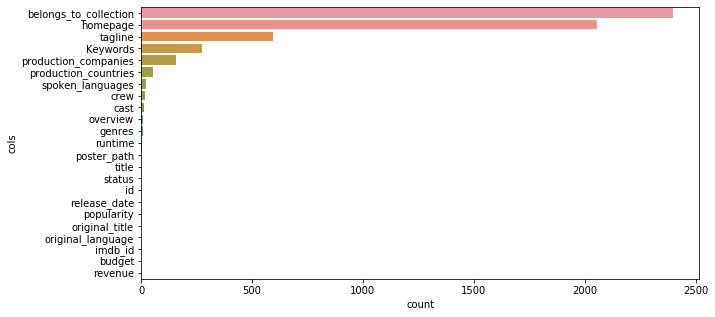

In [7]:
temp = train.isnull().sum()
temp = temp.to_frame()
temp = temp.reset_index()
temp.columns = ['cols', 'count']
temp = temp.sort_values('count', ascending=False)
plt.figure(figsize = (10,5))
sns.barplot(y='cols',x='count', data=temp)

In [8]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [9]:
# Percentage of missing values in 'test' dataframe.
test_total = len(test)
for col in list(test.columns):
    percentage = ((test_total - test[col].count()) / test_total) * 100
    print(col + ' = ' + '{0:.2f}'.format(percentage) + '% missing.')

id = 0.00% missing.
belongs_to_collection = 80.06% missing.
budget = 0.00% missing.
genres = 0.36% missing.
homepage = 67.71% missing.
imdb_id = 0.00% missing.
original_language = 0.00% missing.
original_title = 0.00% missing.
overview = 0.32% missing.
popularity = 0.00% missing.
poster_path = 0.02% missing.
production_companies = 5.87% missing.
production_countries = 2.32% missing.
release_date = 0.02% missing.
runtime = 0.09% missing.
spoken_languages = 0.95% missing.
status = 0.05% missing.
tagline = 19.62% missing.
title = 0.07% missing.
Keywords = 8.94% missing.
cast = 0.30% missing.
crew = 0.50% missing.


Visualizing the number of missing values in the 'test' dataframe

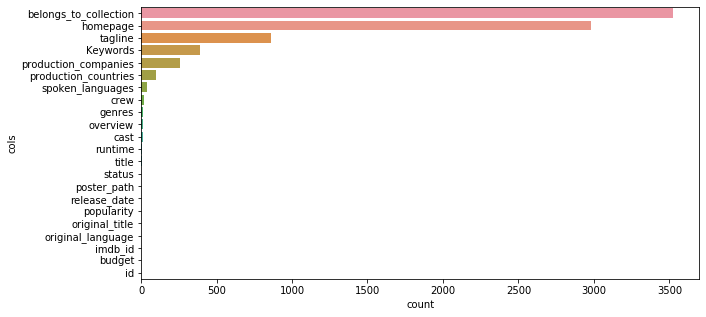

In [10]:
temp = test.isnull().sum()
temp = temp.to_frame()
temp = temp.reset_index()
temp.columns = ['cols', 'count']
temp = temp.sort_values('count', ascending=False)
plt.figure(figsize = (10,5))
sns.barplot(y='cols',x='count', data=temp)

The distribution of null values across both test and train datasets is the same.

In [11]:
print('Number of rows with budget values as zero = ' + str(len(train[train['budget']==0])))

Number of rows with budget values as zero = 812


In [12]:
len(test[test['budget']==0])

1211

In [13]:
train['revenue'].loc[train['id'] == 16]

15    198
Name: revenue, dtype: int64

In [14]:
train.head(3).T

,0,1,2
id,1,2,3
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN
budget,14000000,40000000,3300000
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]"
homepage,NaN,NaN,http://sonyclassics.com/whiplash/
imdb_id,tt2637294,tt0368933,tt2582802
original_language,en,en,en
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ..."
popularity,6.57539,8.24889,64.3


## Editing wrong values for the 'revenue' and 'budget' columns
**NOTE: All budget values of zero(812 of them) cannot be corrected because for some films the producers deliberately do not provide financials. Hence no budget data is available. For films where the correct budget data has been found relevant corrections have been made below in both 'train' and 'test' dataframes.**

In [10]:
train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000      
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1865,'revenue'] = 25000000      
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

In [11]:
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

**Inspecting the 'budget' column values.**

<AxesSubplot:xlabel='budget'>

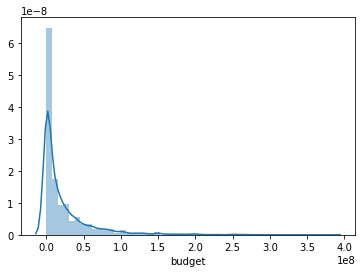

In [12]:
sns.distplot(train['budget'])

A lot of budget values seem to be close to zero. Let us further inspect.
Let's look at budget values less than 50,000,000 

<AxesSubplot:xlabel='budget'>

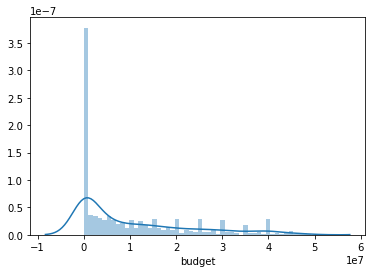

In [13]:
temp = train['budget'][train['budget']<0.5e8]
sns.distplot(temp, bins=50)

Any budget values less than 0?

In [14]:
t = train['budget'][train['budget']<0].sum()
if t==0:
    print('No')

No


How many budget values are 0?

In [15]:
len(train['budget'][train['budget']==0])

796

796 zero budget values is too high. It is not possible that a movie is made with a zero budget, atleast commercially. It is likely that the producers did not share budget information and hence was unavailable or wrongly entered here.

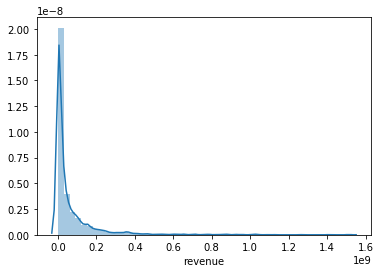

In [21]:
sns.distplot(train['revenue'])

In [22]:
train['revenue'].describe()

count    3.000000e+03
mean     6.668176e+07
std      1.375149e+08
min      1.000000e+00
25%      2.401550e+06
50%      1.680707e+07
75%      6.877599e+07
max      1.519558e+09
Name: revenue, dtype: float64

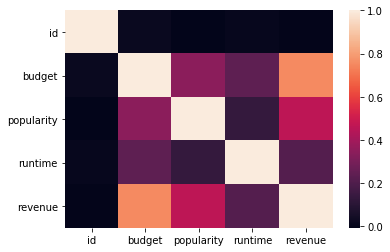

In [23]:
corr = train.corr()
sns.heatmap(corr)

In [24]:
training_data = train['budget'].values.reshape(-1,1)
target = train['revenue'].values.reshape(-1,1)

model = LinearRegression()
model.fit(training_data, target)
testing_data = test['budget'].values.reshape(-1, 1)
predictions = model.predict(testing_data)
predictions

array([[ 3055630.78399918],
       [ 3302707.82210734],
       [ 3055630.78399918],
       ...,
       [47978728.62184601],
       [ 8671018.01373004],
       [ 3235323.17535057]])

In [25]:
submission['revenue'] = predictions
submission

,id,revenue
0,3001,3.055631e+06
1,3002,3.302708e+06
2,3003,3.055631e+06
3,3004,2.214795e+07
4,3005,8.671018e+06
...,...,...
4393,7394,1.209788e+08
4394,7395,5.640181e+07
4395,7396,4.797873e+07
4396,7397,8.671018e+06


In [26]:
submission.to_csv('my_linreg', index=False)

Kaggle score with above submission = 2.61925 (Rank 986)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null datetime64[ns]
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords     

In [28]:
rf_cols = ['budget', 'original_language', 'popularity', 'release_date', 'runtime', 'status', 'homepage', 'overview', 'revenue']
rf_train = train[rf_cols].copy()
rf_cols.remove('revenue')
rf_test = test[rf_cols].copy()

**Budget Column**

**No missing values in 'train' or 'test'**

In [29]:
# Get median values of budget of train set where budget value is greater than zero.
median_budget = train['budget'][train['budget']>0].median()
median_budget

16000000.0

In [30]:
train['budget_is_median'] = 0
test['budget_is_median'] = 0

def replace_0_budget(df, median_val):
    """Replaces zero budget values with the median budget values of train set
        and sets 'budget_is_median' value to 1"""
    df['budget_is_median'] = 0
    df.loc[df['budget']==0, 'budget_is_median'] = 1
    df.loc[df['budget']==0, 'budget'] = median_val
    return df

In [31]:
rf_train = replace_0_budget(rf_train, median_budget)
rf_test = replace_0_budget(rf_test, median_budget)

In [32]:
rf_train['budget_is_median'].value_counts()

0    2204
1     796
Name: budget_is_median, dtype: int64

**Original_language column**

**No Missing values in 'train' or 'test' dataframe.

This is a categorical variable. Let us find the most commonly occurring value of 'original_language' across both the train('rf_train') & test('rf_test') set.

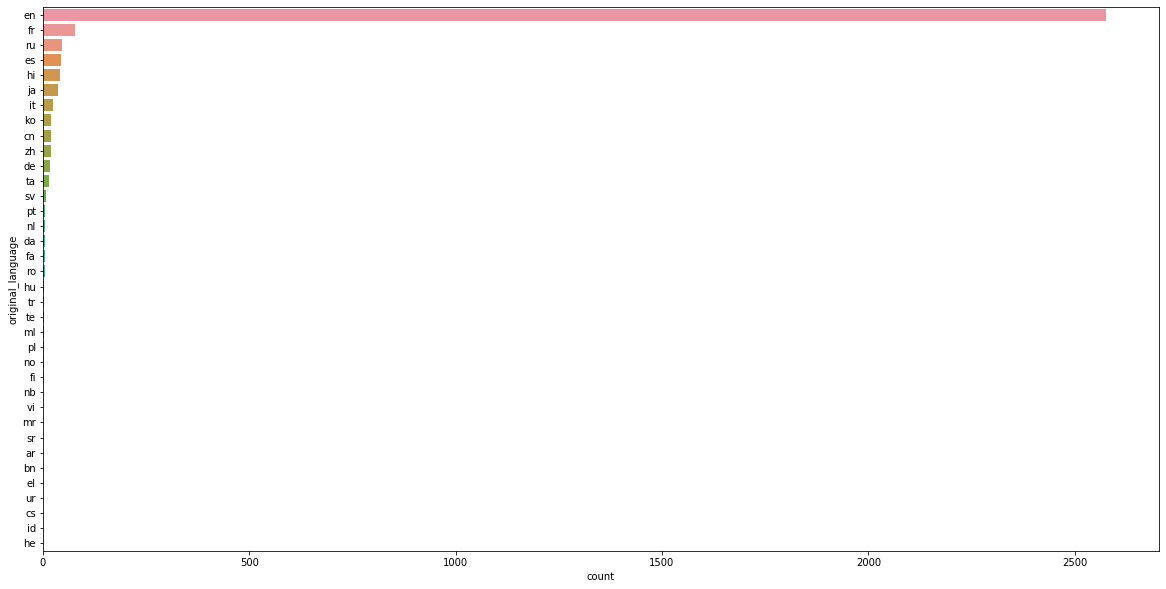

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(y='original_language', data=rf_train, order=train['original_language'].value_counts().index)

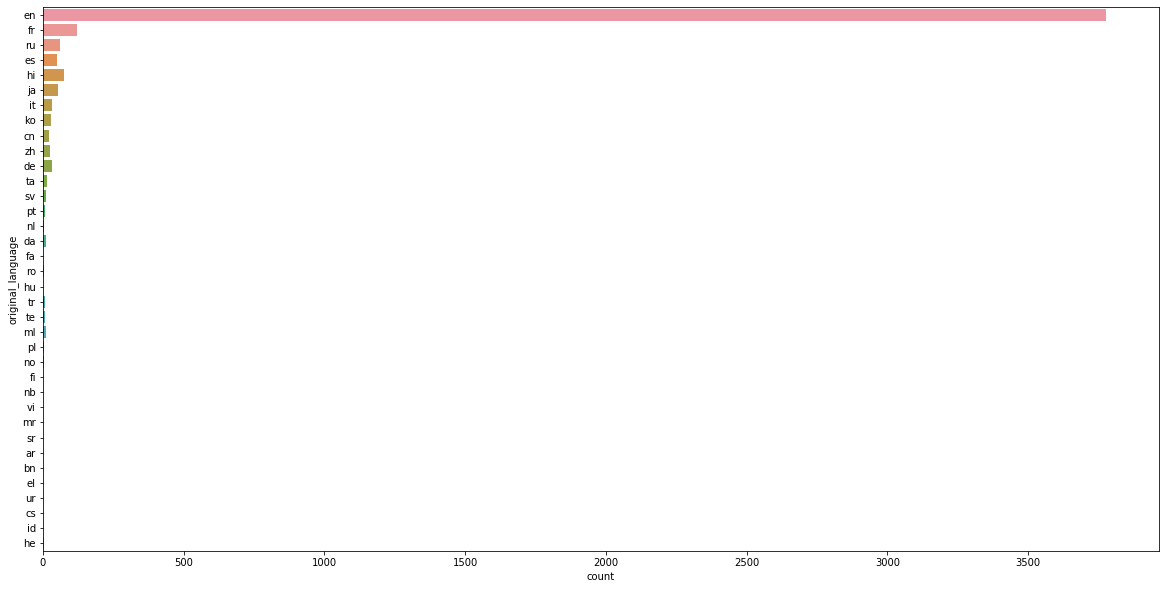

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(y='original_language', data=rf_test, order=train['original_language'].value_counts().index)

**One hot encoding** the values for 'original_language' column. Lesser occurring values have been grouped into 'other' value.

In [35]:
# One hot encoding 'original_language' values in 'train' dataframe.
lang_cols = ['en', 'fr', 'ru', 'es', 'hi', 'ja', 'it', 'ko', 'cn', 'zh', 'de', 'ta']
rf_train.loc[~rf_train['original_language'].isin(lang_cols), 'original_language'] = 'other'
rf_train = pd.get_dummies(rf_train, columns=['original_language'])

In [36]:
# View changes
list(rf_train.columns)

['budget',
 'popularity',
 'release_date',
 'runtime',
 'status',
 'homepage',
 'overview',
 'revenue',
 'budget_is_median',
 'original_language_cn',
 'original_language_de',
 'original_language_en',
 'original_language_es',
 'original_language_fr',
 'original_language_hi',
 'original_language_it',
 'original_language_ja',
 'original_language_ko',
 'original_language_other',
 'original_language_ru',
 'original_language_ta',
 'original_language_zh']

In [37]:
# One hot encoding 'original_language' in 'test' dataframe.
rf_test.loc[~rf_test['original_language'].isin(lang_cols), 'original_language'] = 'other'
rf_test = pd.get_dummies(rf_test, columns=['original_language'])

In [38]:
# View changes
list(rf_test.columns)

['budget',
 'popularity',
 'release_date',
 'runtime',
 'status',
 'homepage',
 'overview',
 'budget_is_median',
 'original_language_cn',
 'original_language_de',
 'original_language_en',
 'original_language_es',
 'original_language_fr',
 'original_language_hi',
 'original_language_it',
 'original_language_ja',
 'original_language_ko',
 'original_language_other',
 'original_language_ru',
 'original_language_ta',
 'original_language_zh']

**Status Column**

**No missing values in 'train' dataframe
<br>
2 missing values in 'test' dataframe**

In [39]:
rf_train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [40]:
train[['release_date', 'original_title']][train['status']!='Released']

,release_date,original_title
609,1997-01-01,The Swan Princess: Escape from Castle Mountain
1007,2011-02-05,Billy Gardell: Halftime
1216,1986-08-22,Extremities
1618,1998-02-20,A Place Called Chiapas


In [41]:
test['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [42]:
test[['release_date', 'original_title']][test['status']!='Released']

,release_date,original_title
102,1987-05-13,"Good Morning, Babilonia"
264,2011-06-03,The Last Mountain
828,NaT,"Jails, Hospitals & Hip-Hop"
847,2017-08-11,Good Time
1056,2002-09-09,Stevie
1260,2013-05-02,What Maisie Knew
1448,1986-12-12,Crimes of the Heart
1477,2008-12-23,Любовь-морковь 2
2585,2011-08-26,Higher Ground


**It does not make sense to have the 'status' column in training of the model since most values are 'released' with very few exceptions. Also with a google search it is apparent that the films without a 'released' value under the 'status' column seem to have been released.**

In [43]:
# Dropping column 'status' from 'rf_train' and 'rf_test' dataframes.
rf_train.drop(columns='status', inplace=True)
rf_test.drop(columns='status', inplace=True)

**Homepage Column**

**'object' type column.
<br>
68% values are missing in the train set for 'homepage' column.
<br>
67% are missing in the test set for the 'homepage' column.**

The link to the actual homepage of a film does not seem useful instead it makes more sense to make the 'homepage' feature categorical and have two categories - has homepage, does not have homepage. This can be then one hot encoded to get two columns.

In [44]:
rf_train.loc[rf_train['homepage'].notnull(), 'homepage'] = 1
rf_train.loc[rf_train['homepage'].isnull(), 'homepage'] = 0

In [45]:
rf_test.loc[rf_test['homepage'].notnull(), 'homepage'] = 1
rf_test.loc[rf_test['homepage'].isnull(), 'homepage'] = 0 

In [46]:
rf_train['homepage'].value_counts()

0    2054
1     946
Name: homepage, dtype: int64

In [47]:
rf_test['homepage'].value_counts()

0    2978
1    1420
Name: homepage, dtype: int64

**Runtime Column**
<br>
2 out of 3000 values missing in 'rf_train'.
<br>
4 out of 4398 values missing in 'rf_test'.

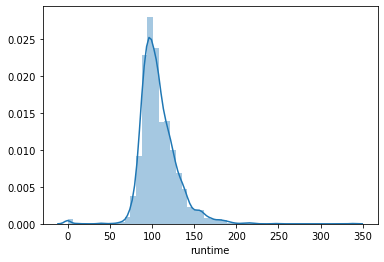

In [48]:
sns.distplot(rf_train['runtime'])

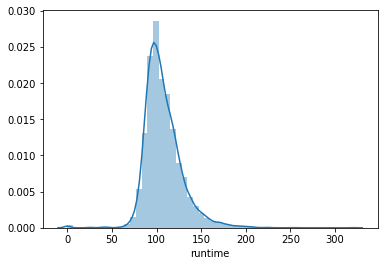

In [49]:
sns.distplot(rf_test['runtime'])

In [50]:
rf_train['runtime'].median()

104.0

In [51]:
# Since we have extremely few null values, they are
# replaced with the respective median value
median_runtime = rf_train['runtime'].median()
value = {'runtime' : median_runtime} # Replacing null values only for the 'runtime' column!
rf_train.fillna(value, inplace=True)
rf_test.fillna(value, inplace=True)

We can see that we have several outliers in the 'runtime' column in both the train and test dataframes. Let us further explore these data points and verify that their runtimes.

**First**, we explore the films with 'runtime' values at the lower end - less than 50 mins - in both train and test sets. 

In [52]:
train[['release_date', 'genres', 'original_title', 'title', 'spoken_languages', 'runtime']][train['runtime']<50]

,release_date,genres,original_title,title,spoken_languages,runtime
390,2012-12-22,"[{'id': 35, 'name': 'Comedy'}]",Il peggior Natale della mia vita,The Worst Christmas of My Life,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",0.0
591,2003-12-04,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",А поутру они проснулись,А поутру они проснулись,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",0.0
775,2011-04-08,"[{'id': 99, 'name': 'Documentary'}]",Born to Be Wild,Born to Be Wild,"[{'iso_639_1': 'en', 'name': 'English'}]",40.0
924,2013-11-15,"[{'id': 35, 'name': 'Comedy'}]",¿Quién mató a Bambi?,¿Quién mató a Bambi?,"[{'iso_639_1': 'es', 'name': 'Español'}]",0.0
977,2011-10-27,"[{'id': 35, 'name': 'Comedy'}]",La peggior settimana della mia vita,La peggior settimana della mia vita,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",0.0
1020,1995-02-01,"[{'id': 99, 'name': 'Documentary'}]",The Living Sea,The Living Sea,"[{'iso_639_1': 'en', 'name': 'English'}]",40.0
1255,1975-08-25,"[{'id': 37, 'name': 'Western'}]",Cipolla Colt,"Cry, Onion!","[{'iso_639_1': 'en', 'name': 'English'}]",0.0
1541,2014-06-05,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",Все и сразу,All at Once,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",0.0
1874,2007-01-01,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",Vermist,Missing,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",0.0
2150,2006-10-12,"[{'id': 28, 'name': 'Action'}, {'id': 10749, '...",Mechenosets,Mechenosets,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",0.0


In [53]:
len(rf_test[rf_test['runtime']<50])

16

In [54]:
test[['release_date', 'genres', 'original_title', 'title', 'spoken_languages', 'runtime']][test['runtime']<50]

,release_date,genres,original_title,title,spoken_languages,runtime
1073,2010-01-15,"[{'id': 35, 'name': 'Comedy'}]",Shikshanachya Aaicha Gho,Shikshanachya Aaicha Gho,"[{'iso_639_1': 'mr', 'name': ''}]",0.0
1221,1993-03-12,NaN,Street Knight,Street Knight,"[{'iso_639_1': 'en', 'name': 'English'}]",0.0
1266,1983-10-19,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",Mickey's Christmas Carol,Mickey's Christmas Carol,"[{'iso_639_1': 'en', 'name': 'English'}]",26.0
1430,2008-08-21,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",Плюс один,Plus one,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",0.0
2279,1983-01-01,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",Winnie the Pooh and a Day for Eeyore,Winnie the Pooh and a Day for Eeyore,"[{'iso_639_1': 'en', 'name': 'English'}]",25.0
2519,2010-05-06,NaN,Glukhar v kino,Glukhar v kino,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",0.0
2602,2000-05-05,"[{'id': 99, 'name': 'Documentary'}]",Michael Jordan to the Max,Michael Jordan to the Max,"[{'iso_639_1': 'en', 'name': 'English'}]",46.0
2707,2008-07-15,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",Dr. Horrible's Sing-Along Blog,Dr. Horrible's Sing-Along Blog,"[{'iso_639_1': 'en', 'name': 'English'}]",42.0
2844,2015-01-15,"[{'id': 35, 'name': 'Comedy'}]",Frau Müller muss weg!,Frau Müller muss weg!,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",0.0
2848,2005-02-04,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",Shabd,Shabd,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",0.0


**Next**, lets observe the films with 'runtime' values at the higher end - greater than 200 mins - both train and test sets. 

In [55]:
train[['release_date', 'genres', 'original_title', 'title', 'spoken_languages', 'runtime']][train['runtime']>200]

,release_date,genres,original_title,title,spoken_languages,runtime
523,2056-10-05,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",The Ten Commandments,The Ten Commandments,"[{'iso_639_1': 'en', 'name': 'English'}]",220.0
625,2059-12-26,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Ben-Hur,Ben-Hur,"[{'iso_639_1': 'en', 'name': 'English'}]",212.0
1211,2010-05-19,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",Carlos,Carlos,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",338.0
1302,1980-11-19,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Heaven's Gate,Heaven's Gate,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",219.0
1914,2003-02-21,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",Gods and Generals,Gods and Generals,"[{'iso_639_1': 'en', 'name': 'English'}]",214.0
1922,2063-06-12,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",Cleopatra,Cleopatra,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",248.0
1975,2011-12-12,"[{'id': 35, 'name': 'Comedy'}]",Шапито-шоу,Chapiteau-Show,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",207.0
2353,2008-02-15,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Jodhaa Akbar,Jodhaa Akbar,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}, {'iso_...",213.0


In [56]:
test[['release_date', 'genres', 'original_title', 'title', 'spoken_languages', 'runtime']][test['runtime']>200]

,release_date,genres,original_title,title,spoken_languages,runtime
132,1994-08-05,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Hum Aapke Hain Koun,Hum Aapke Hain Koun,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",206.0
231,2056-10-10,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Giant,Giant,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",201.0
1185,1993-10-08,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",Gettysburg,Gettysburg,"[{'iso_639_1': 'en', 'name': 'English'}]",254.0
1424,2054-04-26,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",七人の侍,Seven Samurai,"[{'iso_639_1': 'ja', 'name': '日本語'}]",207.0
2065,2001-06-15,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",लगान,Lagaan: Once Upon a Time in India,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",224.0
2710,2012-06-22,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",Gangs of वासेपुर,Gangs of Wasseypur,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",320.0
3192,2056-08-21,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",War and Peace,War and Peace,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",208.0
3335,2039-12-15,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Gone with the Wind,Gone with the Wind,"[{'iso_639_1': 'en', 'name': 'English'}]",238.0
3611,2003-12-01,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,"[{'iso_639_1': 'en', 'name': 'English'}]",201.0
3856,2060-03-27,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Exodus,Exodus,"[{'iso_639_1': 'en', 'name': 'English'}]",208.0


Correcting the 'runtime' values for incorrect 'runtime' values found above.

In [57]:
#'rf_train' dataframe with film 'runtime' values less than 50
rf_train.iloc[390, 3] = 86
rf_train.iloc[591, 3] = 90
rf_train.iloc[924, 3] = 86
rf_train.iloc[977, 3] = 93
rf_train.iloc[1255, 3] = 92
rf_train.iloc[1541, 3] = 93
rf_train.iloc[1874, 3] = 86
rf_train.iloc[2150, 3] = 108
rf_train.iloc[2498, 3] = 86
rf_train.iloc[2577, 3] = 11
rf_train.iloc[2645, 3] = 98
rf_train.iloc[2785, 3] = 111
rf_train.iloc[2865, 3] = 96

#'rf_train' dataframe with film 'runtime' values greater than 200
rf_train.drop(1211, inplace=True) # dropped because runtime is extreme/outlier.
# To maintain symmetry we drop the same row from the 'train' dataset as well.
train.drop(1211, inplace=True)
rf_train.iloc[1914, 3] = 219
rf_train.iloc[1922, 3] = 192
rf_train.iloc[1975, 3] = 111

#'rf_test' dataframe with film 'runtime' values less than 50
rf_test.iloc[1073, 3] = 103
rf_test.iloc[1221, 3] = 91
rf_test.iloc[1430, 3] = 96
rf_test.iloc[2519, 3] = 86
rf_test.iloc[2844, 3] = 83
rf_test.iloc[2848, 3] = 140
rf_test.iloc[3209, 3] = 104
rf_test.iloc[3803, 3] = 140
rf_test.iloc[4320, 3] = 87

#'rf_test' dataframe with film 'runtime' values greater than 200
rf_test.iloc[1185, 3] = 271
rf_test.iloc[4253, 3] = 228
rf_test.iloc[4381, 3] = 184


In [58]:
# Reset the indices to account for dropped column in 'rf_train' and 'train' dataframes
rf_train.reset_index(drop=True, inplace=True)
train.reset_index(drop=True, inplace=True)

**Release_date Column**

We have only one missing value for 'release_date' column in the test dataset.

In [59]:
# Replacing the null 'release_date' value in the 'rf_test' dataframe.
rf_test.iloc[828, 2] = pd.Timestamp(year=2000, month=5, day=1)

In [60]:
def add_date_features(df):
    df['day'] = df['release_date'].dt.day
    df['month'] = df['release_date'].dt.month
    df['year'] = df['release_date'].dt.year
    df['quarter_year'] = df['release_date'].dt.quarter
    df['day_of_week'] = df['release_date'].dt.dayofweek
    df['near_weekend'] = 0
    days_near_weekend = [4, 5, 6]
    df.loc[df['day_of_week'].isin(days_near_weekend), 'near_weekend'] = 1
    df.drop(columns=['day_of_week', 'release_date'], axis=1, inplace=True)
    return df
    

In [61]:
rf_train = add_date_features(rf_train)
rf_test = add_date_features(rf_test)

**-> 'production_companies', 'production_countries', 'Keywords', 'crew', 'cast', 'belongs_to_collection' Columns.**
<br>
* **'production_companies'** -> How many production companies involved?<br>
* **'production_countries'** -> How many countries involved in production?<br>
* **'Keywords'** -> How many Keywords?<br>
* **'crew'** -> Size of crew<br>
* **'cast'** -> Number of people cast in film.<br>
* **'belongs_to_collection'** -> Does the film belong to a collection, if yes then what is the name of collection?

In [62]:
train['belongs_to_collection']

0       [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1       [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
2994                                                  NaN
2995                                                  NaN
2996                                                  NaN
2997                                                  NaN
2998                                                  NaN
Name: belongs_to_collection, Length: 2999, dtype: object

In [63]:
def extract_pythoncode(s):
    """Function to evaluate a string as Python code"""
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [64]:
manipulate_cols = ['production_companies', 'production_countries', 'Keywords', 'crew', 'cast']
def use_other_features(df, main_df):
    """Function to convert columns in manipulate_cols to a more useful form"""
    for col in manipulate_cols:

        df[col] = main_df[col]
        df[col] = df[col].apply(lambda val: extract_pythoncode(val))
        # Get number of dictionaries.
        df[col] = df[col].apply(lambda val: 0 if val == {} else len(val))
    return df

In [65]:
rf_train = use_other_features(rf_train, train)
rf_test = use_other_features(rf_test, test)

**belongs_to_collection Column**

In [66]:
rf_train['belongs_to_collection'] = train['belongs_to_collection']
rf_train['belongs_to_collection'] = rf_train['belongs_to_collection'].apply(lambda x:extract_pythoncode(x))
rf_test['belongs_to_collection'] = test['belongs_to_collection']
rf_test['belongs_to_collection'] = rf_test['belongs_to_collection'].apply(lambda x:extract_pythoncode(x))

rf_train['collection_name'] = rf_train['belongs_to_collection'].apply(lambda val: val[0]['name'] if val != {} else '0')
rf_test['collection_name'] = rf_test['belongs_to_collection'].apply(lambda val: val[0]['name'] if val != {} else '0')

le = LabelEncoder() # Label Encode 'collection' name.
rf_combined = pd.concat([rf_train, rf_test], sort=False)
le.fit(rf_combined['collection_name'])

rf_train['collection_name'] = le.transform(rf_train['collection_name'])
rf_test['collection_name'] = le.transform(rf_test['collection_name'])
rf_train['belongs_to_collection'] = rf_train['belongs_to_collection'].apply(lambda val: 0 if val == {} else 1)
rf_test['belongs_to_collection'] = rf_test['belongs_to_collection'].apply(lambda val: 0 if val == {} else 1)
mappings = dict(zip(le.classes_, le.transform(le.classes_)))
print('mappings:-')
print(mappings)


mappings:-
{'... Has Fallen Collection': 0, '0': 1, '101 Dalmatians (Animated) Collection': 2, '101 Dalmatians (Live-Action) Collection': 3, '12 Rounds Collection': 4, '2 Days In... Collection': 5, '20th Century Boys Collection': 6, '28 Days/Weeks Later Collection': 7, '3 Men (Original) Collection': 8, '30 Days of Night Collection': 9, '300 Collection': 10, '48 Hrs. Collection': 11, '8MM Collection': 12, '976-EVIL Collection': 13, '9½ Weeks Collection': 14, 'A Better Tomorrow Collection': 15, 'A Christmas Story Collection': 16, 'A Few Best Men Collection': 17, 'A Goofy Movie Collection': 18, 'A Haunted House Collection': 19, 'A Nightmare on Elm Street Collection': 20, 'ABCD Collection': 21, 'AVP Collection': 22, 'Aashiqui Collection': 23, 'Ace Ventura Collection': 24, 'Addams Family Collection': 25, 'Agent Cody Banks Collection': 26, 'Air Bud Collection': 27, 'Airplane Collection': 28, 'Airport Collection': 29, "Aki Kaurismäki's Finland trilogy": 30, 'Aladdin Collection': 31, 'Alex Cro

**Overview Column**

In [67]:
def process_overview(df):
    """ Function to process 'overview' column and give a word count instead """
    df['overview_wordcount'] = df['overview'].apply(lambda str_sentence: 0 if str_sentence is np.nan else len(str(str_sentence).split()))
    df.drop('overview', axis=1, inplace=True)
    return df

In [68]:
rf_train = process_overview(rf_train)
rf_test = process_overview(rf_test)

In [69]:
# View changes to 'overview' column
rf_train['overview_wordcount']

0        29
1        69
2        21
3       106
4        32
       ... 
2994     42
2995     26
2996     58
2997     55
2998     22
Name: overview_wordcount, Length: 2999, dtype: int64

**Feature Engineering**

In [70]:
def create_features(df):
    df['budget_by_runtime'] = np.round(df['budget']/df['runtime'], decimals=2)
    df['budget_by_year_sq'] = np.round(df['budget']/(np.square(df['year'])), decimals=2)
    df['year_by_popularity'] = np.round(df['year']/df['popularity'], decimals=2)
    return df

In [71]:
rf_train = create_features(rf_train)
rf_test = create_features(rf_test)

In [72]:
# Final form of training set
rf_train.head()

,budget,popularity,runtime,homepage,revenue,budget_is_median,original_language_cn,original_language_de,original_language_en,original_language_es,...,production_countries,Keywords,crew,cast,belongs_to_collection,collection_name,overview_wordcount,budget_by_runtime,budget_by_year_sq,year_by_popularity
0,14000000.0,6.575393,93.0,0,12314651,0,0,0,1,0,...,1,4,72,24,1,282,29,150537.63,3.45,306.45
1,40000000.0,8.248895,113.0,0,95149435,0,0,0,1,0,...,1,4,9,20,1,641,69,353982.30,9.96,242.94
2,3300000.0,64.299990,105.0,1,13092000,0,0,0,1,0,...,1,12,64,51,0,1,21,31428.57,0.81,31.32
3,1200000.0,3.174936,122.0,1,16000000,0,0,0,0,0,...,1,7,3,7,0,1,106,9836.07,0.30,633.71
4,16000000.0,1.148070,118.0,0,3923970,1,0,0,0,0,...,1,0,2,4,0,1,32,135593.22,3.96,1749.89


In [73]:
# Final form of testing set
rf_test.head()

,budget,popularity,runtime,homepage,budget_is_median,original_language_cn,original_language_de,original_language_en,original_language_es,original_language_fr,...,production_countries,Keywords,crew,cast,belongs_to_collection,collection_name,overview_wordcount,budget_by_runtime,budget_by_year_sq,year_by_popularity
0,16000000.0,3.851534,90.0,1,1,0,0,0,0,0,...,2,2,2,7,1,420,57,177777.78,3.97,521.09
1,88000.0,3.559789,65.0,0,0,0,0,1,0,0,...,1,8,8,10,0,1,29,1353.85,0.02,578.12
2,16000000.0,8.085194,100.0,0,1,0,0,1,0,0,...,1,4,10,9,0,1,61,160000.00,4.01,246.99
3,6800000.0,8.596012,130.0,1,0,0,0,0,0,1,...,2,15,69,23,0,1,50,52307.69,1.68,233.83
4,2000000.0,3.217680,92.0,0,0,0,0,1,0,0,...,1,4,14,4,0,1,145,21739.13,0.50,623.12


In [74]:
# Making relevant transformations to the train and test datasets before running classifiers

y = (rf_train['revenue']).values
# Transform the target variable 'revenue'
y = np.log1p(y)
rf_train.drop(['revenue'], axis=1, inplace=True)
x = rf_train.values
x_test = rf_test.values
print(y.shape)
print(x.shape)
print(x_test.shape)

(2999,)
(2999, 34)
(4398, 34)


In [75]:
list(rf_train.columns)

['budget',
 'popularity',
 'runtime',
 'homepage',
 'budget_is_median',
 'original_language_cn',
 'original_language_de',
 'original_language_en',
 'original_language_es',
 'original_language_fr',
 'original_language_hi',
 'original_language_it',
 'original_language_ja',
 'original_language_ko',
 'original_language_other',
 'original_language_ru',
 'original_language_ta',
 'original_language_zh',
 'day',
 'month',
 'year',
 'quarter_year',
 'near_weekend',
 'production_companies',
 'production_countries',
 'Keywords',
 'crew',
 'cast',
 'belongs_to_collection',
 'collection_name',
 'overview_wordcount',
 'budget_by_runtime',
 'budget_by_year_sq',
 'year_by_popularity']

## Cross Validation

In [106]:
# NOTE: 'y' variable already contains the logarithmic of the target variable values!
def rmsle(y_trueval, y_predval):
    """Function to compute and return the root mean squared logarithmic error metric"""
    return np.sqrt(mean_squared_error(y_true=y_trueval, y_pred=y_predval))

# Create rsmle score containers for each classifier
rf_rmsle_scores = []
xgb_rmsle_scores = []
lgb_rmsle_scores = []
combined_rmsle_scores = []

kf = KFold(n_splits=10, shuffle=True, random_state=2)

for train_idx, test_idx in kf.split(x):
    train_features, test_features = x[train_idx], x[test_idx]
    train_labels, test_labels = y[train_idx], y[test_idx] # NOTE: All log values!
    # All predicted values and trained labels are in log.
    
    # Select classifier
    classifier = 'combined' # Valid Values = 'rf', 'xgb', 'lgb', 'combined'
    
    if classifier == 'rf':
        rf = RandomForestRegressor(n_estimators = 25, 
                                   min_samples_leaf = 5, 
                                   max_features = 0.2, 
                                   random_state = 42)
        rf.fit(train_features, train_labels)
        predictions_rf = np.round(rf.predict(test_features), decimals=2)
        rmsle_score = rmsle(test_labels, predictions_rf)
        rf_rmsle_scores.append(rsmsle_score)
        
    elif classifier == 'xgb':
        xgboost = XGBRegressor(n_estimators=50000,
                               learning_rate=0.001,
                               max_depth=6)
        xgboost.fit(train_features, train_labels)
        predictions_xgb = np.round(xgboost.predict(test_features), decimals=2)
        rmsle_score = rmsle(test_labels, predictions_xgb)
        xgb_rmsle_scores.append(rmsle_score)
        
    elif classifier == 'lgb':
        params = {'boosting_type':'gbdt',
                  'objective':'regression',
                  'max_depth':6,
                  'learning_rate':0.01}
        lgb_train = lgb.Dataset(train_features, train_labels)
        lgboost = lgb.train(params, 
                            lgb_train,
                            num_boost_round=500)
        predictions_lgb = np.round(lgboost.predict(test_features))
        rmsle_score = rmsle(test_labels, predictions_lgb)
        lgb_rmsle_scores.append(rmsle_score)
        
    elif classifier == 'combined':
        # random forest 
        rf = RandomForestRegressor(n_estimators = 25, 
                                   min_samples_leaf = 5, 
                                   max_features = 0.2, 
                                   random_state = 42)
        rf.fit(train_features, train_labels)
        predictions_rf = np.round(rf.predict(test_features), decimals=2)
        
        # xgboost
        xgboost = XGBRegressor(n_estimators=50000,
                               learning_rate=0.001,
                               max_depth=6)
        xgboost.fit(train_features, train_labels)
        predictions_xgb = np.round(xgboost.predict(test_features), decimals=2)
        
        # lgboost
        params = {'boosting_type':'gbdt',
                  'objective':'regression',
                  'max_depth':6,
                  'learning_rate':0.01}
        lgb_train = lgb.Dataset(train_features, train_labels)
        lgboost = lgb.train(params, 
                            lgb_train,
                            num_boost_round=500)
        predictions_lgb = np.round(lgboost.predict(test_features))
        
        predictions = (predictions_rf + predictions_xgb + predictions_lgb) / 3
        rmsle_score = rmsle(test_labels, predictions)
        combined_rmsle_scores.append(rmsle_score)
        
        
if classifier == 'rf':
    print('Random Forest Regressor rmsle score = ' + str(np.mean(rf_rmsle_scores)))
elif classifier == 'xgb':
    print("XGBoost Regressor rsmle score = " + str(np.mean(xgb_rmsle_scores)))
elif classifier == 'lgb':
    print("LGBoost rmsle score = " + str(np.mean(lgb_rmsle_scores)))
elif classifier == 'combined':
    print("Combined rmsle score = " + str(np.mean(combined_rmsle_scores)))
    
        

[00:03:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:17:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:24:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:31:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:38:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:45:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:58:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

## Training and prediction on test

In [81]:
# Read the sample submission file
sub = pd.read_csv('sample_submission.csv')
sub

,id,revenue
0,3001,1000000
1,3002,1000000
2,3003,1000000
3,3004,1000000
4,3005,1000000
...,...,...
4393,7394,1000000
4394,7395,1000000
4395,7396,1000000
4396,7397,1000000


In [108]:
classifier_final = 'combined' # Valid values = 'rf', 'xgb', 'lgb', 'combined'

if classifier_final == 'rf':
    # Random Forest Regression Model
    rf = RandomForestRegressor(n_estimators = 25, 
                               min_samples_leaf = 10, 
                               max_features = 0.2, 
                               random_state = 42)
    rf.fit(x, y)
    predictions = rf.predict(x_test)
    
elif classifier_final == 'xgb':
    # XGBoost model
    xgboost = XGBRegressor(n_estimators=5500,
                             learning_rate=0.01,
                             )
    xgboost.fit(x, y)
    predictions = xgboost.predict(x_test)
    
elif classifier_final == 'lgb':
    # Light GBM model
    params = {'boosting_type':'gbdt',
              'objective':'regression',
              'max_depth':7,
              'learning_rate':0.006}
    lgb_train = lgb.Dataset(x,y)
    gbm = lgb.train(params, 
                    lgb_train,
                    num_boost_round=1000)
    predictions = gbm.predict(x_test)
    
elif classifier_final == 'combined':
    # Combining rf, xgb, lgb model 
    
    # rf
    rf = RandomForestRegressor(n_estimators = 25, 
                               min_samples_leaf = 5, 
                               max_features = 0.2, 
                               random_state = 42)
    rf.fit(x, y)
    predictions_rf = rf.predict(x_test)
    
    # xgb
    xgboost = XGBRegressor(n_estimators=50000,
                             learning_rate=0.001,
                             max_depth=6)
    xgboost.fit(x, y)
    predictions_xgb = xgboost.predict(x_test)
    
    # lgb
    params = {'boosting_type':'gbdt',
              'objective':'regression',
              'max_depth':6,
              'learning_rate':0.01}
    lgb_train = lgb.Dataset(x,y)
    gbm = lgb.train(params, 
                    lgb_train,
                    num_boost_round=500)
    predictions_lgb = gbm.predict(x_test)
    
    predictions = (predictions_rf + predictions_xgb + predictions_lgb) / 3
    
# Recall 'y' target variable is a logarithmic transformation of original values!
# Inverse transform and round predictions before submission
sub['revenue'] = np.round(np.expm1(predictions), decimals = 2)
sub.to_csv('ensemble_set1.csv', index=False)
sub

[01:28:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,id,revenue
0,3001,1023726.98
1,3002,1870288.52
2,3003,6258787.01
3,3004,4466821.11
4,3005,867052.29
...,...,...
4393,7394,38854367.26
4394,7395,33164324.57
4395,7396,39433025.67
4396,7397,9115519.10
